In [38]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

import matplotlib

In [39]:
def convtime(x):
    x=x.removesuffix(':00+00:00')
    x=x.replace('T',' ')
    return x

In [40]:
signals=pd.read_csv('../1-input/5-signals-training.csv', sep=';')
print(signals.shape)
signals1=pd.read_csv('../1-input/5-signals-testing.csv', sep=';')
print(signals1.shape)
signals=signals.append(signals1)
print(signals.shape)
signals['Timestamp']=signals['Timestamp'].apply(convtime)
signals['Timestamp'] = pd.to_datetime(signals['Timestamp'])
signals['working']=signals.Grd_Prod_Pwr_Avg.apply(lambda x: 1 if x>50 else 0)
signals.loc[signals.working==1].shape, signals.shape
signals.reset_index(drop=True, inplace=True)
signals.head()


(434145, 83)
(87639, 83)


C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\3030828519.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  signals=signals.append(signals1)


(521784, 83)


,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,working
0,T11,2016-01-01,1339.4,1233.3,1270.9,18.8,42.0,59,61,60,...,-752.6,-1000.0,56.5,973.4,1000.0,752.6,56.5,38,206.9,1
1,T06,2016-01-01,1270.0,1232.8,1248.5,6.8,42.0,51,52,53,...,0.0,-880.6,180.0,307.1,880.6,0.0,180.0,35,204.6,1
2,T01,2016-01-01,1277.4,1226.1,1249.0,9.0,41.0,58,59,58,...,0.0,-584.5,157.1,144.4,584.5,0.0,157.1,37,218.5,0
3,T09,2016-01-01,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,...,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0,1
4,T07,2016-01-01,1317.5,1229.5,1254.9,13.8,41.0,62,62,61,...,0.0,-1000.0,338.9,536.5,1000.0,0.0,338.9,39,197.3,1


In [41]:
fails=pd.read_csv('../1-input/3-failures.csv', sep=';')
fails['Timestamp']=fails['Timestamp'].apply(convtime)
fails['Timestamp'] = pd.to_datetime(fails['Timestamp'])

fails


,Turbine_ID,Component,Timestamp,Remarks
0,T01,GEARBOX,2016-07-18 02:10:00,Gearbox pump damaged
1,T06,GENERATOR,2016-07-11 19:48:00,Generator replaced
2,T06,GENERATOR,2016-07-24 17:01:00,Generator temperature sensor failure
3,T06,GENERATOR,2016-09-04 08:08:00,High temperature generator error
4,T06,GENERATOR,2016-10-27 16:26:00,Generator replaced
5,T06,GENERATOR,2016-10-02 17:08:00,Refrigeration system and temperature sensors i...
6,T06,HYDRAULIC_GROUP,2016-04-04 18:53:00,Error in pitch regulation
7,T07,GENERATOR_BEARING,2016-04-30 12:40:00,High temperature in generator bearing (replace...
8,T07,TRANSFORMER,2016-07-10 03:46:00,High temperature transformer
9,T07,TRANSFORMER,2016-08-23 02:21:00,High temperature transformer. Transformer refr...


In [42]:
fgen=fails.loc[fails.Component=='TRANSFORMER']

fgen

,Turbine_ID,Component,Timestamp,Remarks
8,T07,TRANSFORMER,2016-07-10 03:46:00,High temperature transformer
9,T07,TRANSFORMER,2016-08-23 02:21:00,High temperature transformer. Transformer refr...
16,T01,TRANSFORMER,2017-08-11 13:14:00,Transformer fan damaged


In [43]:
signals=signals.loc[signals.working==1]
signals.reset_index(drop=True, inplace=True)
fgen.reset_index(drop=True, inplace=True)

In [44]:
signals['fase60']=0
signals['vid_util']=60*24*6


for j, moment in enumerate(signals.Timestamp):
    for i, event in enumerate(fgen.Timestamp):
        delta=  event-moment
        sep2=[3]
        sep=str(delta).split(' days')
        sep[0]=float(sep[0])
        sep[1]=sep[1].removeprefix(' +').removesuffix(':00').split(':')
        sep2[0]=sep[0]
        sep2.append(int(sep[1][0]))
        sep2.append(int(sep[1][1]))
        sep=sep2
        if sep[0]<60 and sep[0]>0 and fgen.Turbine_ID[i]==signals.Turbine_ID[j]:
            signals['fase60'][j]=1
            calc=sep[0]*(24*6)+sep[1]*6+sep[2]/10
            signals['vid_util'][j]=calc
        else: 
            continue
            
            


C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\4077355795.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['fase60'][j]=1
C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\4077355795.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signals['vid_util'][j]=calc


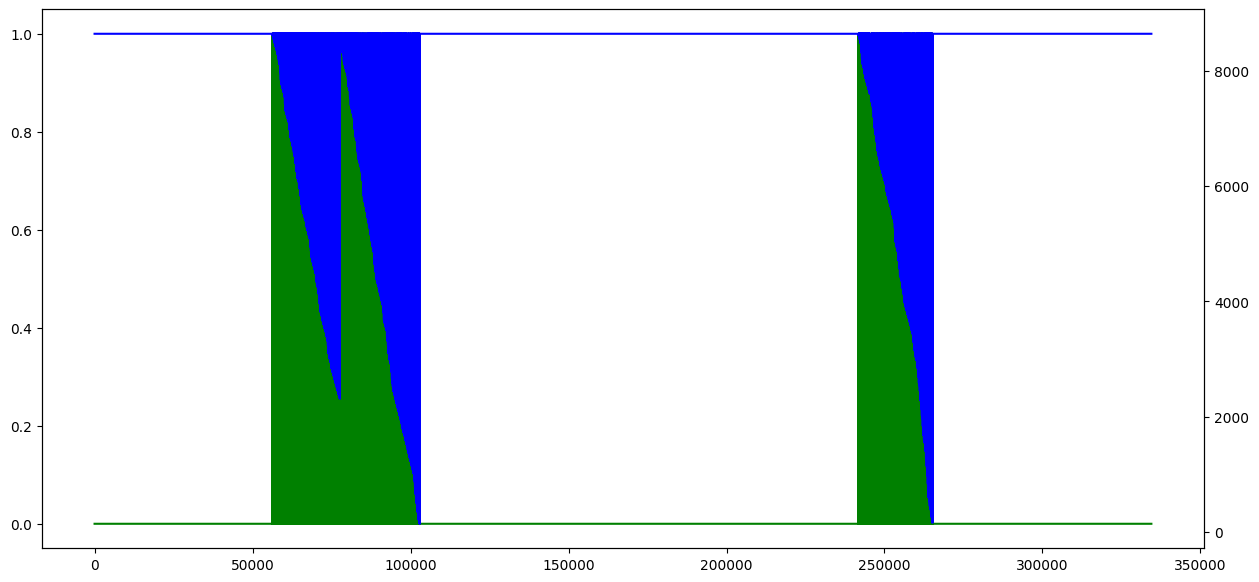

In [45]:
values1=signals['fase60']
values2=signals['vid_util']
fig, ax1 = plt.subplots(figsize=(15,7))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

In [46]:
signals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334467 entries, 0 to 334466
Data columns (total 86 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Turbine_ID                   334467 non-null  object        
 1   Timestamp                    334467 non-null  datetime64[ns]
 2   Gen_RPM_Max                  334467 non-null  float64       
 3   Gen_RPM_Min                  334467 non-null  float64       
 4   Gen_RPM_Avg                  334467 non-null  float64       
 5   Gen_RPM_Std                  334467 non-null  float64       
 6   Gen_Bear_Temp_Avg            334462 non-null  float64       
 7   Gen_Phase1_Temp_Avg          334467 non-null  int64         
 8   Gen_Phase2_Temp_Avg          334467 non-null  int64         
 9   Gen_Phase3_Temp_Avg          334467 non-null  int64         
 10  Hyd_Oil_Temp_Avg             334467 non-null  int64         
 11  Gear_Oil_Temp_Avg         

In [47]:
signals.loc[signals['fase60']==1]

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,working,fase60,vid_util
56241,T07,2016-05-11 04:00:00,1263.2,1235.0,1250.5,4.7,33.0,48,48,48,...,109.5,415.8,740.6,205.5,109.5,31,140.5,1,1,8638.6
56245,T07,2016-05-11 04:10:00,1393.8,1232.8,1263.1,24.4,33.0,50,50,50,...,253.3,628.9,1000.0,30.5,253.3,31,147.9,1,1,8637.6
56251,T07,2016-05-11 04:20:00,1444.6,1270.1,1347.3,35.7,33.0,52,52,52,...,0.0,1000.0,1000.0,1000.0,0.0,31,156.6,1,1,8636.6
56255,T07,2016-05-11 04:30:00,1507.2,1301.7,1393.3,48.3,34.0,54,54,53,...,0.0,1000.0,1000.0,1000.0,0.0,32,156.6,1,1,8635.6
56263,T07,2016-05-11 04:40:00,1506.2,1280.7,1355.2,47.5,35.0,56,56,55,...,0.0,1000.0,1000.0,1000.0,0.0,33,156.6,1,1,8634.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265129,T01,2017-08-10 05:10:00,1284.9,1213.4,1250.4,13.4,33.0,43,44,43,...,172.7,257.9,710.0,0.0,172.7,33,222.4,1,1,192.4
265134,T01,2017-08-10 05:20:00,1291.1,1224.1,1252.9,14.0,34.0,46,47,46,...,219.1,354.4,1000.0,0.0,219.1,34,222.4,1,1,191.4
265136,T01,2017-08-10 05:30:00,1307.7,1224.2,1255.7,14.9,35.0,49,49,49,...,265.9,506.6,1000.0,0.0,265.9,35,222.4,1,1,190.4
265180,T01,2017-08-10 10:10:00,1391.4,237.1,1103.5,337.4,34.0,38,38,38,...,239.2,367.4,911.2,0.0,239.2,34,204.1,1,1,162.4


In [48]:
listc=signals.columns
listc

Index(['Turbine_ID', 'Timestamp', 'Gen_RPM_Max', 'Gen_RPM_Min', 'Gen_RPM_Avg',
       'Gen_RPM_Std', 'Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg',
       'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Hyd_Oil_Temp_Avg',
       'Gear_Oil_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg',
       'Rtr_RPM_Max', 'Rtr_RPM_Min', 'Rtr_RPM_Avg', 'Amb_WindSpeed_Max',
       'Amb_WindSpeed_Min', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg', 'Amb_Temp_Avg',
       'Prod_LatestAvg_ActPwrGen0', 'Prod_LatestAvg_ActPwrGen1',
       'Prod_LatestAvg_ActPwrGen2', 'Prod_LatestAvg_TotActPwr',
       'Prod_LatestAvg_ReactPwrGen0', 'Prod_LatestAvg_ReactPwrGen1',
       'Prod_LatestAvg_ReactPwrGen2', 'Prod_LatestAvg_TotReactPwr',
       'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg',
       'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg',
       'Gen_SlipRing_Temp_Avg', 'Spin

In [49]:
'''plt.figure(figsize=(40, 40))

mask=np.triu(np.ones_like(signals.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(signals.corr(),
           #mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});'''

"plt.figure(figsize=(40, 40))\n\nmask=np.triu(np.ones_like(signals.corr(), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\nsns.heatmap(signals.corr(),\n           #mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          annot=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5});"

In [50]:
cor_matrix = signals.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
to_drop2=['working', 'Prod_LatestAvg_ActPwrGen2','Prod_LatestAvg_ReactPwrGen2']
to_drop+=to_drop2

C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\234955373.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))


In [51]:
signals.drop(to_drop, axis=1, inplace=True)
signals

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util
0,T11,2016-01-01 00:00:00,1339.4,1233.3,1270.9,18.8,42.0,59,30,48,...,-973.4,-752.6,-1000.0,56.5,973.4,1000.0,38,206.9,0,8640.0
1,T06,2016-01-01 00:00:00,1270.0,1232.8,1248.5,6.8,42.0,51,30,43,...,-307.1,0.0,-880.6,180.0,307.1,880.6,35,204.6,0,8640.0
2,T09,2016-01-01 00:00:00,1376.7,1234.3,1272.0,24.7,40.0,58,44,43,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,33,214.0,0,8640.0
3,T07,2016-01-01 00:00:00,1317.5,1229.5,1254.9,13.8,41.0,62,32,45,...,-536.5,0.0,-1000.0,338.9,536.5,1000.0,39,197.3,0,8640.0
4,T09,2016-01-01 00:10:00,1485.0,1239.7,1321.4,50.4,40.0,58,44,43,...,-871.4,-293.3,-1000.0,227.4,871.4,1000.0,33,214.0,0,8640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334462,T11,2017-12-31 23:50:00,1320.5,1216.8,1262.0,20.6,42.0,56,28,50,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,37,331.5,0,8640.0
334463,T07,2017-12-31 23:50:00,1329.9,1193.0,1257.6,18.9,38.0,61,30,49,...,-966.0,-256.3,-1000.0,109.8,966.0,1000.0,32,334.8,0,8640.0
334464,T01,2017-12-31 23:50:00,1273.1,1239.8,1250.7,4.7,39.0,59,26,49,...,-983.9,-727.0,-1000.0,50.2,983.9,1000.0,38,347.8,0,8640.0
334465,T09,2017-12-31 23:50:00,1258.3,1239.7,1249.5,3.1,39.0,60,45,46,...,-955.8,-372.9,-1000.0,119.2,955.8,1000.0,32,339.7,0,8640.0


In [52]:
def turbine_name(x):
    equis=int(x.removeprefix('T'))       
    return equis

In [53]:
signals.Turbine_ID=signals.Turbine_ID.apply(lambda x: turbine_name(x))
signals=signals.dropna().reset_index(drop=True)

In [54]:
import random

list_ceros= signals.loc[(signals.fase60==0)].index
list_unos= signals.loc[(signals.fase60==1)].index
list_ceros_equal=random.choices(list(list_ceros), k=len(list_unos)*4)
list_analysis= list_ceros_equal + list(list_unos)
list_analysis.sort()
signals2=signals.iloc[list_analysis]
len(list_ceros_equal), len(list_ceros), len(list_unos), len(list_analysis)

(56112, 320434, 14028, 70140)

In [55]:
signals.iloc[list_unos].fase60

56241     1
56245     1
56251     1
56255     1
56263     1
         ..
265129    1
265134    1
265136    1
265180    1
265181    1
Name: fase60, Length: 14028, dtype: int64

In [56]:
signals2.head(10)

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util
5,7,2016-01-01 00:10:00,1271.1,1233.4,1251.9,7.1,42.0,62,32,45,...,-469.6,0.0,-763.5,180.8,469.6,763.5,39,203.9,0,8640.0
7,11,2016-01-01 00:20:00,1423.6,1270.8,1344.3,27.2,43.0,60,30,49,...,-1000.0,-986.9,-1000.0,0.2,1000.0,1000.0,38,206.9,0,8640.0
15,6,2016-01-01 00:30:00,1399.2,1228.8,1252.5,16.5,42.0,49,31,42,...,-493.2,0.0,-1000.0,237.5,493.2,1000.0,35,205.6,0,8640.0
15,6,2016-01-01 00:30:00,1399.2,1228.8,1252.5,16.5,42.0,49,31,42,...,-493.2,0.0,-1000.0,237.5,493.2,1000.0,35,205.6,0,8640.0
15,6,2016-01-01 00:30:00,1399.2,1228.8,1252.5,16.5,42.0,49,31,42,...,-493.2,0.0,-1000.0,237.5,493.2,1000.0,35,205.6,0,8640.0
19,9,2016-01-01 00:40:00,1536.5,1337.1,1426.9,42.0,41.0,59,44,45,...,-998.9,-730.8,-1000.0,13.9,998.9,1000.0,34,214.0,0,8640.0
23,1,2016-01-01 00:50:00,1462.6,1249.5,1328.5,48.3,40.0,58,30,45,...,-996.0,-714.7,-1000.0,27.4,996.0,1000.0,36,221.3,0,8640.0
26,11,2016-01-01 01:00:00,1401.2,1238.4,1280.6,27.9,44.0,61,30,50,...,-932.2,-502.3,-1000.0,135.0,932.2,1000.0,39,206.9,0,8640.0
35,1,2016-01-01 01:10:00,1335.2,1225.1,1268.7,18.6,40.0,59,30,45,...,-878.3,-393.0,-1000.0,170.7,878.3,1000.0,37,221.3,0,8640.0
36,1,2016-01-01 01:20:00,1370.7,1230.8,1279.4,25.6,40.0,60,30,45,...,-926.4,-419.1,-1000.0,138.9,926.4,1000.0,38,221.3,0,8640.0


In [57]:
signals2.fase60.value_counts()

0    56112
1    14028
Name: fase60, dtype: int64

In [58]:
X=signals.drop(['fase60','vid_util','Timestamp','Turbine_ID', 'Grd_Prod_Freq_Avg', 'Grd_Prod_PsbleInd_Min', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_CosPhi_Avg', 'Prod_LatestAvg_ReactPwrGen0', 'Grd_Prod_PsbleInd_Std', 'Blds_PitchAngle_Max', 'Prod_LatestAvg_ActPwrGen0', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Std', 'Grd_Prod_PsbleCap_Max', 'Prod_LatestAvg_ReactPwrGen1', 'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_Pwr_Std'], axis=1)[:275365]

y=signals.fase60[:275365]

X.shape, y.shape

((275365, 38), (275365,))

In [59]:
Xbus=signals.drop(['fase60','vid_util','Timestamp','Turbine_ID', 'Grd_Prod_Freq_Avg', 'Grd_Prod_PsbleInd_Min', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_CosPhi_Avg', 'Prod_LatestAvg_ReactPwrGen0', 'Grd_Prod_PsbleInd_Std', 'Blds_PitchAngle_Max', 'Prod_LatestAvg_ActPwrGen0', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_ReactPwr_Std', 'Grd_Prod_PsbleCap_Max', 'Prod_LatestAvg_ReactPwrGen1', 'Grd_Prod_VoltPhse3_Avg', 'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_Pwr_Std'], axis=1)[275365:]
ybus=signals.fase60[275365:]

Xbus.shape, ybus.shape

((59097, 38), (59097,))

In [60]:
from sklearn.model_selection import train_test_split as tts

from sklearn.svm import SVR 
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC

from sklearn.metrics import balanced_accuracy_score as balacc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as acc

logreg=LogReg (max_iter=500)
rfc=RFC(n_estimators=500)
xgbc=XGBC()
svr=SVR()

from sklearn.preprocessing import RobustScaler


In [61]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((220292, 38), (55073, 38), (220292,), (55073,))

In [62]:
modelos=[ xgbc]

'''logreg, rfc,'''

modelos_name=[ 'xgbc']

''' 'LogReg', 'RFC','''

balacc_score=[]
prec_score=[]
rec_score=[]
f1_score=[]
acc_score=[]

for i,m in enumerate(modelos):

    m.fit(X_train, y_train)
    
    y_pred=m.predict(X_test)
    
    acc_score.append(acc(y_test, y_pred))
    prec_score.append(prec(y_test, y_pred))
    rec_score.append(rec(y_test, y_pred))
    f1_score.append(f1(y_test, y_pred))
    
    print(modelos_name[i])

analisis= pd.DataFrame({"modelos" : modelos_name, "acc_score" : acc_score, "prec_score" : prec_score, "rec_score" : rec_score, "f1_score" : f1_score})

analisis


xgbc


,modelos,acc_score,prec_score,rec_score,f1_score
0,xgbc,0.986,0.917077,0.797003,0.852835


In [63]:
y_res=m.predict(Xbus)

modelos_name.append('resultado')
acc_score.append(acc(ybus, y_res))
prec_score.append(prec(ybus, y_res))
rec_score.append(rec(ybus, y_res))
f1_score.append(f1(ybus, y_res))

analisis= pd.DataFrame({"modelos" : modelos_name, "acc_score" : acc_score, "prec_score" : prec_score, "rec_score" : rec_score, "f1_score" : f1_score})
analisis

c:\Users\David MC\.conda\envs\Ironhack\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,modelos,acc_score,prec_score,rec_score,f1_score
0,xgbc,0.986000,0.917077,0.797003,0.852835
1,resultado,0.991286,0.000000,0.000000,0.000000


In [64]:
sigres=signals[275365:]

sigres['calculado']=y_res

sigresT6=sigres.loc[(sigres.Turbine_ID==6)]
sigresT9=sigres.loc[(sigres.Turbine_ID==9)]
sigresT11=sigres.loc[(sigres.Turbine_ID==11)]
sigresT1=sigres.loc[(sigres.Turbine_ID==1)]
sigresT7=sigres.loc[(sigres.Turbine_ID==7)]

C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\519670577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigres['calculado']=y_res


C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\1245427771.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT6['dano_acum']=signal


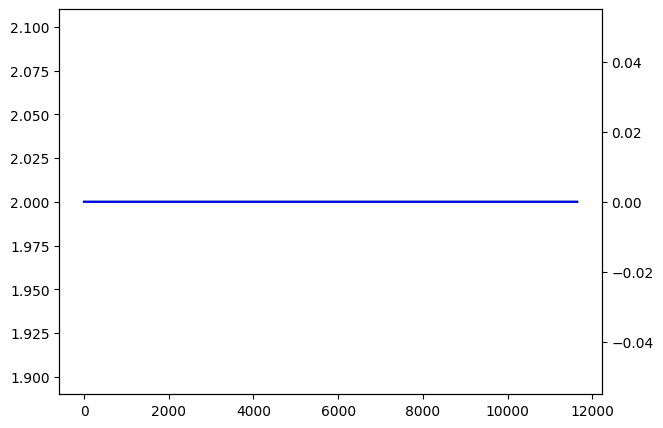

In [65]:
fase60=list(sigresT6['fase60'])
predic=list(sigresT6['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)
    
fase60_2=[item+2 for item in fase60]

sigresT6['dano_acum']=signal

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\2280315876.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT9['dano_acum']=signal


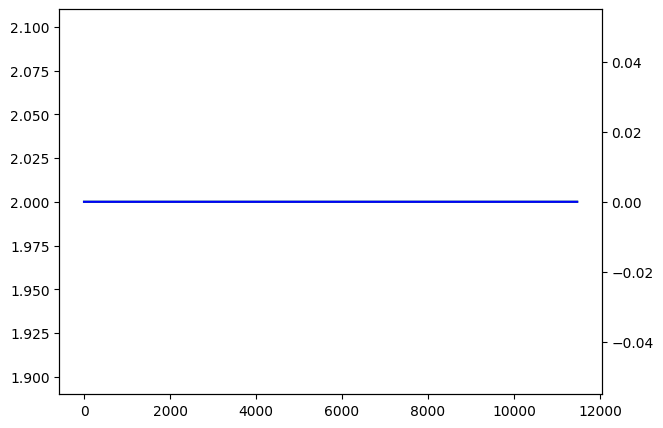

In [66]:
fase60=list(sigresT9['fase60'])
predic=list(sigresT9['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT9['dano_acum']=signal

C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\4009087320.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT11['dano_acum']=signal


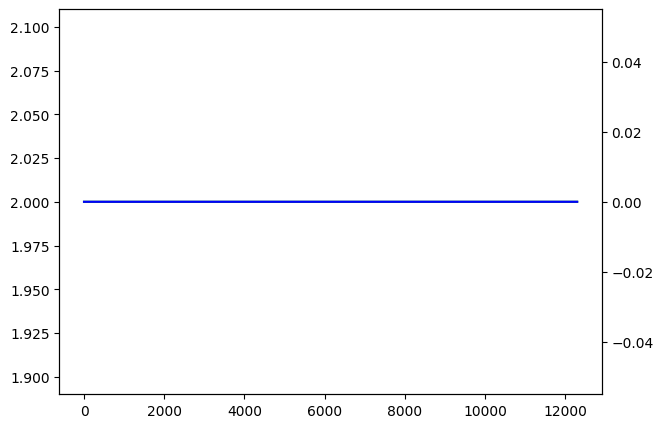

In [67]:
fase60=list(sigresT11['fase60'])
predic=list(sigresT11['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT11['dano_acum']=signal

C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\1960030041.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT1['dano_acum']=signal


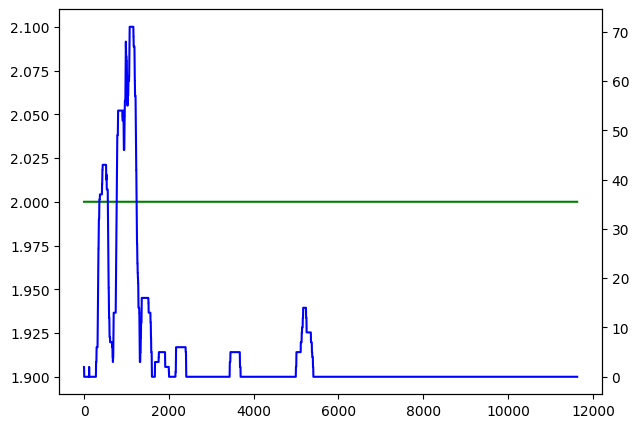

In [68]:
fase60=list(sigresT1['fase60'])
predic=list(sigresT1['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT1['dano_acum']=signal

In [75]:
danoT1= sigresT1.loc[sigresT1['dano_acum']>60].reset_index(drop=True)

danoT1

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,fase60,vid_util,calculado,dano_acum
0,1,2017-09-09 22:20:00,1684.3,1466.3,1624.4,56.6,67.0,83,35,50,...,-1000.0,0.0,1000.0,1000.0,63,266.8,0,8640.0,0,61
1,1,2017-09-09 22:30:00,1692.8,1516.0,1652.7,34.9,67.0,82,35,50,...,-1000.0,0.0,1000.0,1000.0,63,274.2,0,8640.0,0,62
2,1,2017-09-09 22:40:00,1697.9,1487.2,1665.0,32.0,68.0,84,35,51,...,-1000.0,0.0,1000.0,1000.0,62,274.2,0,8640.0,0,63
3,1,2017-09-09 22:50:00,1687.3,1454.6,1611.4,54.2,67.0,82,35,51,...,-1000.0,0.0,1000.0,1000.0,62,274.2,0,8640.0,0,64
4,1,2017-09-09 23:00:00,1670.3,1454.4,1574.7,54.2,65.0,80,35,52,...,-1000.0,0.0,1000.0,1000.0,62,274.2,0,8640.0,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,1,2017-09-13 00:00:00,1269.6,1235.7,1249.1,5.5,47.0,57,42,50,...,-669.8,180.1,357.8,669.8,45,72.5,0,8640.0,1,65
163,1,2017-09-13 00:10:00,1273.8,1230.8,1250.3,8.0,47.0,60,42,50,...,-1000.0,167.7,517.2,1000.0,45,76.6,0,8640.0,1,64
164,1,2017-09-13 00:20:00,1286.6,1230.5,1249.7,6.9,47.0,61,42,50,...,-1000.0,314.3,453.1,1000.0,45,81.8,0,8640.0,1,63
165,1,2017-09-13 00:30:00,1272.6,1229.2,1249.0,6.6,47.0,62,42,50,...,-922.9,164.5,396.2,922.9,45,94.9,0,8640.0,1,62


C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\346489614.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigresT7['dano_acum']=signal


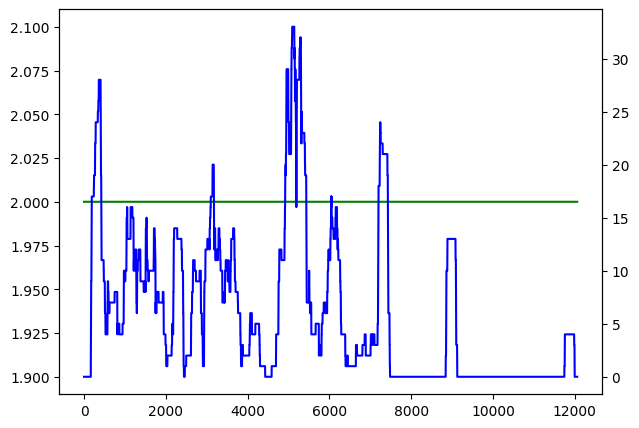

In [69]:
fase60=list(sigresT7['fase60'])
predic=list(sigresT7['calculado'])

signal=[]
suma=0

for i in range(len(predic)):
    suma=sum(predic[i:120+i])+sum(predic[i-120:i])
    signal.append(suma)

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=signal
fig, ax1 = plt.subplots(figsize=(7,5))

ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax2.plot(values2, 'b-')

sigresT7['dano_acum']=signal

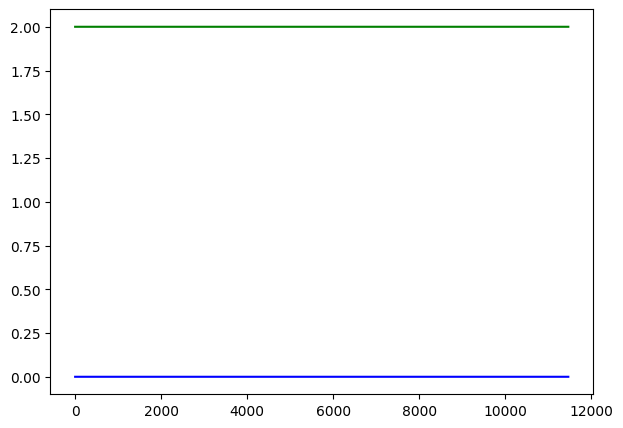

In [70]:
fase60=list(sigresT9['fase60'])
predic=list(sigresT9['calculado'])

fase60_2=[item+2 for item in fase60]

values1=fase60_2
values2=predic
fig, ax1 = plt.subplots(figsize=(7,5))

#ax2 = ax1.twinx()

ax1.plot(values1, 'g-')
ax1.plot(values2, 'b-')

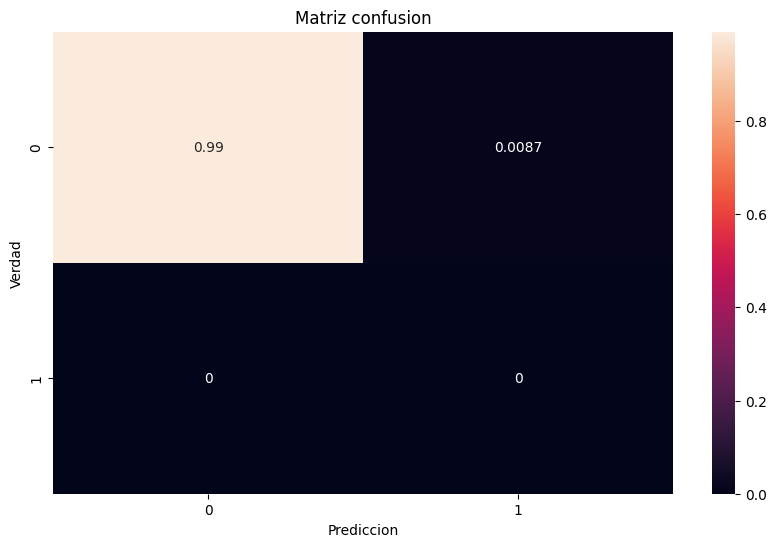

In [71]:
plt.figure(figsize=(10, 6))

ax=sns.heatmap(cm(ybus, y_res)/sum(sum(cm(ybus, y_res))), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [72]:
erre=dict(zip(X.columns, xgbc.feature_importances_))

{k: v for k, v in sorted(erre.items(), key=lambda item: item[1])}

{'Amb_WindDir_Relative_Avg': 0.00380119,
 'Blds_PitchAngle_Min': 0.004750974,
 'Grd_Prod_Pwr_Min': 0.0061958646,
 'Gen_RPM_Min': 0.007671639,
 'Amb_WindSpeed_Max': 0.00767723,
 'Blds_PitchAngle_Std': 0.008175818,
 'Gen_RPM_Avg': 0.008343109,
 'Gen_RPM_Std': 0.008345334,
 'Grd_Prod_PsbleInd_Avg': 0.0086553125,
 'Grd_Prod_Pwr_Max': 0.008767669,
 'Blds_PitchAngle_Avg': 0.009465853,
 'Grd_Prod_PsbleCap_Avg': 0.009708315,
 'Amb_WindSpeed_Avg': 0.009901142,
 'Amb_WindDir_Abs_Avg': 0.010396992,
 'Amb_WindSpeed_Std': 0.01187116,
 'Grd_Prod_ReactPwr_Min': 0.014596137,
 'Gen_RPM_Max': 0.016280558,
 'Amb_WindSpeed_Min': 0.018059148,
 'Cont_Top_Temp_Avg': 0.01853348,
 'Grd_Prod_VoltPhse2_Avg': 0.020887684,
 'Gen_Phase1_Temp_Avg': 0.021785902,
 'Grd_InverterPhase1_Temp_Avg': 0.022423817,
 'Nac_Temp_Avg': 0.023784887,
 'Cont_Hub_Temp_Avg': 0.024483802,
 'Gear_Oil_Temp_Avg': 0.026391923,
 'Nac_Direction_Avg': 0.026785474,
 'Cont_VCP_Temp_Avg': 0.026965644,
 'Gen_Bear2_Temp_Avg': 0.030422544,
 'Cont_V

In [73]:
fgen=fails.loc[fails.Component=='GEARBOX']
fgen.Turbine_ID=fgen.Turbine_ID.apply(lambda x: turbine_name(x))
fgen

C:\Users\David MC\AppData\Local\Temp\ipykernel_13888\1023005062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fgen.Turbine_ID=fgen.Turbine_ID.apply(lambda x: turbine_name(x))


,Turbine_ID,Component,Timestamp,Remarks
0,1,GEARBOX,2016-07-18 02:10:00,Gearbox pump damaged
10,9,GEARBOX,2016-10-11 08:06:00,Gearbox repaired
17,6,GEARBOX,2017-10-17 08:38:00,Gearbox bearings damaged
23,9,GEARBOX,2017-10-18 08:32:00,Gearbox noise
